# Variable selection

In [2]:
data bloodp;
  set '/folders/myfolders/lect2exa.sas7bdat';
run;

In [2]:
proc print data=bloodp  (obs=5);
run;

Obs,sbp,bmi,smkstat,age,smoke_current,smoke_former,eversmoker,patient,weight,CardDeath10yr,BetaBlocker,SRHealth
1,108.828,34.4536,F,56.5066,0,1,1,1,286.458,0,0,.
2,108.828,34.4536,F,56.5066,0,1,1,2,286.458,0,0,.
3,108.828,34.4536,F,56.5066,0,1,1,3,286.458,0,0,.
4,108.828,34.4536,F,56.5066,0,1,1,4,286.458,0,0,.
5,108.828,34.4536,F,56.5066,0,1,1,5,286.458,0,0,.


Using same data set from lecture 2, we will try different methods for variable selection. SAS allows users to subdivide your data into three parts called the training, validation, and test data. 

1. Models are fit on training data and prediction error is obtained. The most common one is the mean squared error (MSE), i.e.,

$$
MSE=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2
$$


2. Tuning is done on the validation data, i.e., variable selection.
3. Test set allows us to which model performs the best.

Why doing this? Because of the Bias-Variance trade-off.

<center><img src='Bias-Variance.png'  width="600"></center>

$$
\mathbb{E}[y-\hat{f}(x)]^2=\mathbb{Var}[\hat{f}(x)]+(\mathbb{Bias}[\hat{f}(x)])^2+\sigma^2
$$

Time to run some examples

Data Set,WORK.BLOODP
Dependent Variable,sbp
Selection Method,Forward
Select Criterion,SBC
Stop Criterion,None
Choose Criterion,Validation ASE
Effect Hierarchy Enforced,None
Random Number Seed,1
Number of Observations Read,4963
Number of Observations Used,1934
Number of Observations Used for Training,980

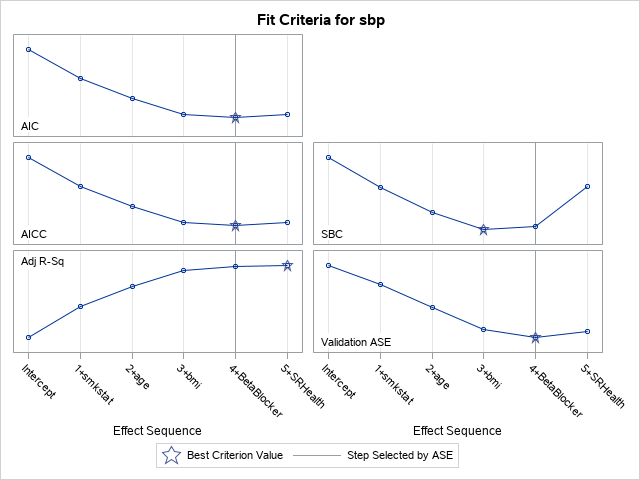
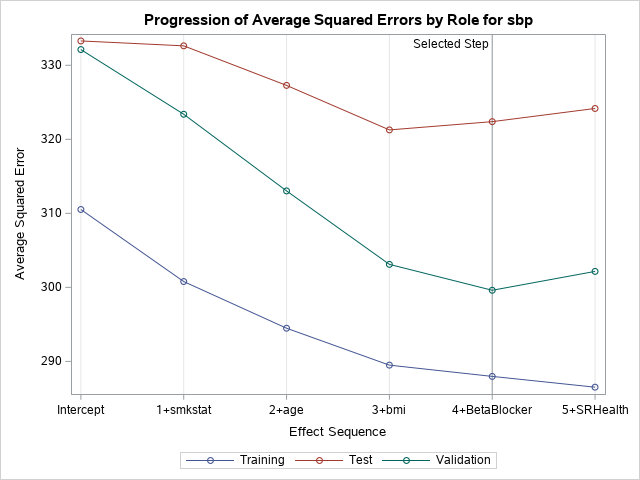

In [4]:
proc glmselect data=bloodp plots=(CriterionPanel ASE) seed=1;
     partition fraction(validate=0.3 test=0.2);
     class smkstat BetaBlocker SRHealth; 
     model sbp = SRHealth smkstat BetaBlocker bmi age 
                  / selection=forward(choose=validate stop=none);
run;

Data Set,WORK.BLOODP
Dependent Variable,sbp
Selection Method,Stepwise
Select Criterion,Significance Level
Stop Criterion,None
Choose Criterion,Validation ASE
Entry Significance Level (SLE),0.15
Stay Significance Level (SLS),0.15
Effect Hierarchy Enforced,None
Random Number Seed,1
Number of Observations Read,4963

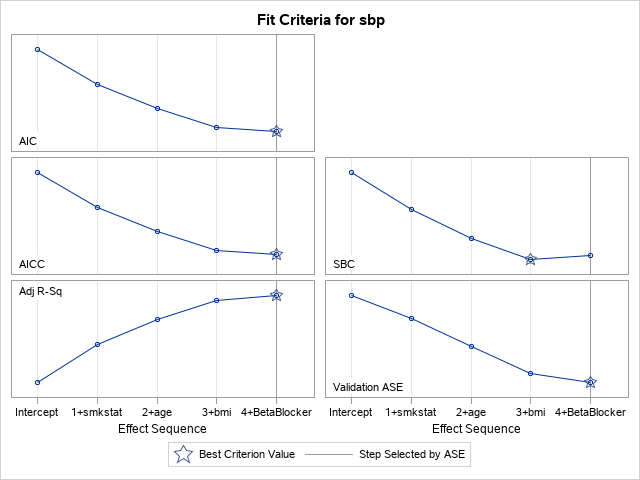
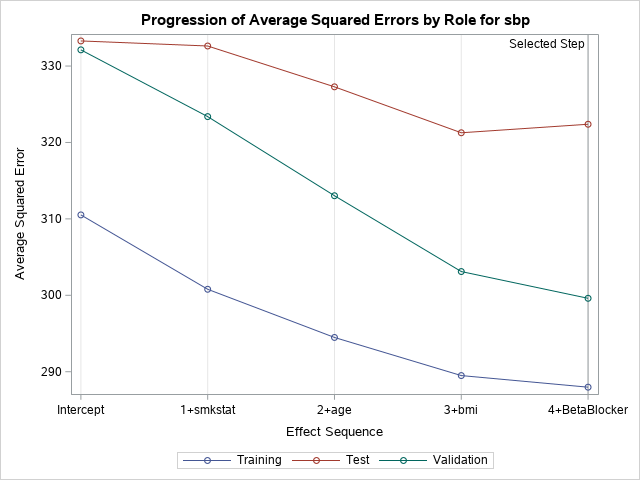

In [5]:
proc glmselect data=bloodp plots=(CriterionPanel ASE) seed=1;
     partition fraction(validate=0.3 test=0.2);
     class smkstat BetaBlocker SRHealth; 
     model sbp = SRHealth smkstat BetaBlocker bmi age 
                  / selection=stepwise(select=SL choose=validate stop=none);
run;

Data Set,WORK.BLOODP
Dependent Variable,sbp
Selection Method,Stepwise
Select Criterion,Significance Level
Stop Criterion,SBC
Choose Criterion,Validation ASE
Entry Significance Level (SLE),0.15
Stay Significance Level (SLS),0.15
Effect Hierarchy Enforced,None
Random Number Seed,1
Number of Observations Read,4963

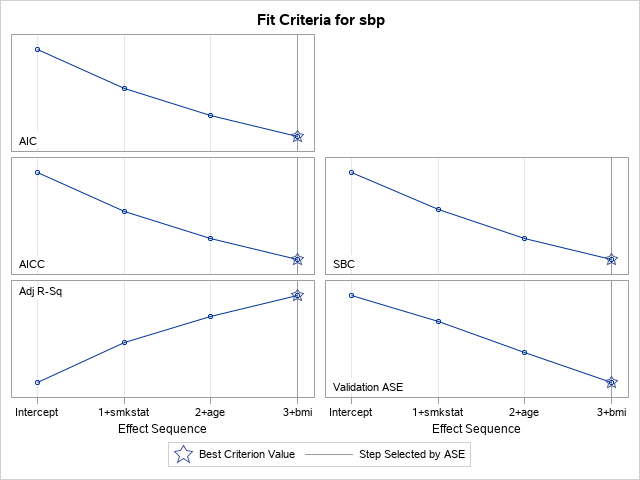
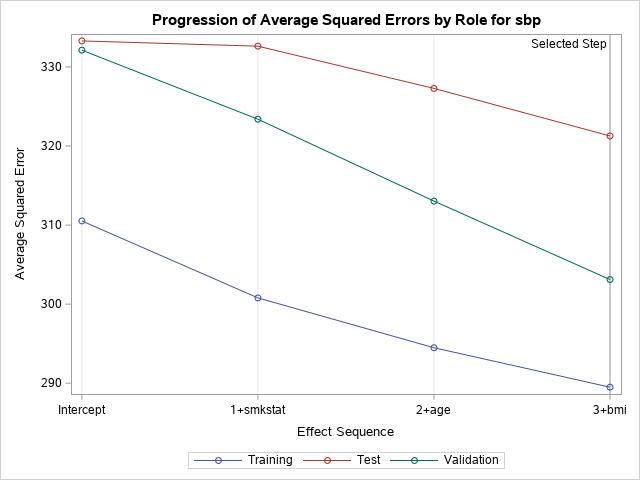

In [6]:
proc glmselect data=bloodp plots=(CriterionPanel ASE) seed=1;
     partition fraction(validate=0.3 test=0.2);
     class smkstat BetaBlocker SRHealth; 
     model sbp = SRHealth smkstat BetaBlocker bmi age 
                  / selection=stepwise(select=SL choose=validate stop=SBC);
run;

## Cross validation

Data Set,WORK.BLOODP
Dependent Variable,sbp
Selection Method,Stepwise
Select Criterion,Significance Level
Stop Criterion,Significance Level
Choose Criterion,Cross Validation
Entry Significance Level (SLE),0.15
Stay Significance Level (SLS),0.15
Cross Validation Method,Split
Cross Validation Fold,10
Effect Hierarchy Enforced,None

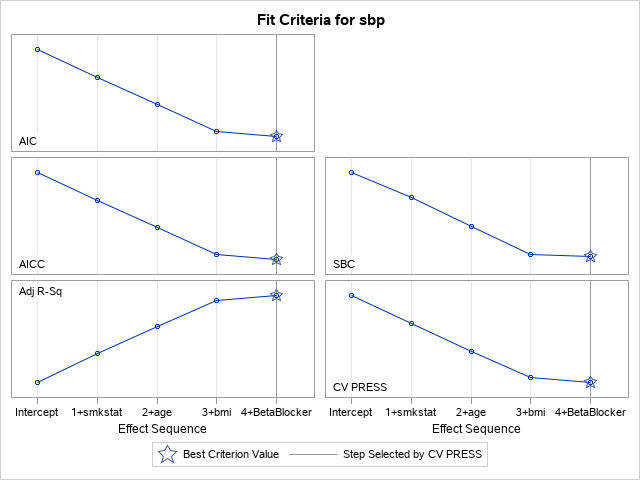
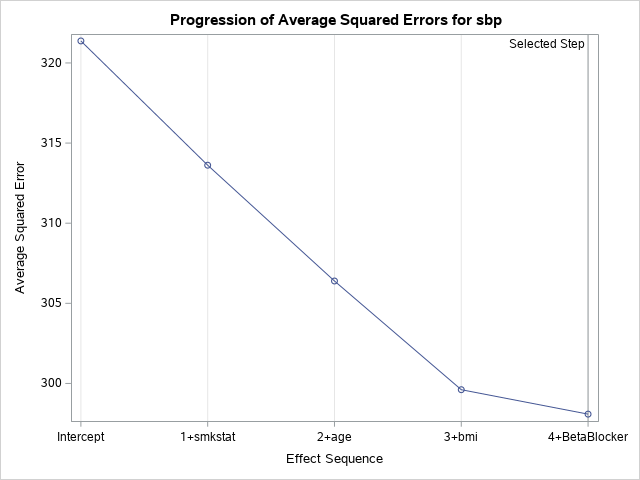

In [7]:
proc glmselect data=bloodp plots=(CriterionPanel ASE) seed=1;
     class smkstat BetaBlocker SRHealth; 
     model sbp = SRHealth smkstat BetaBlocker bmi age 
                  / selection=stepwise(select=SL choose=cv)
                  cvMethod=split(10)
                  cvDetails = all;
run;


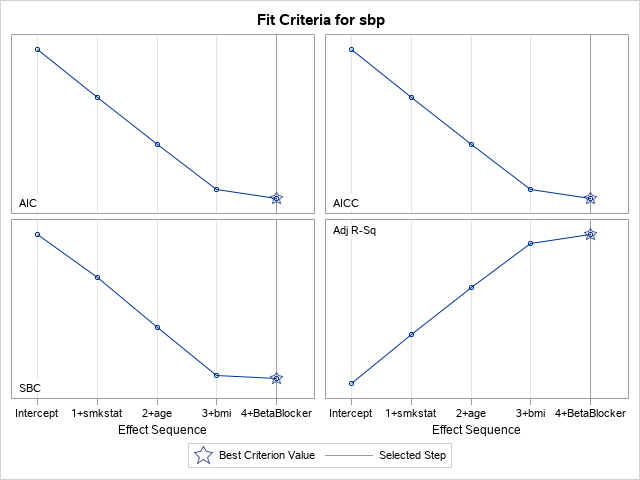
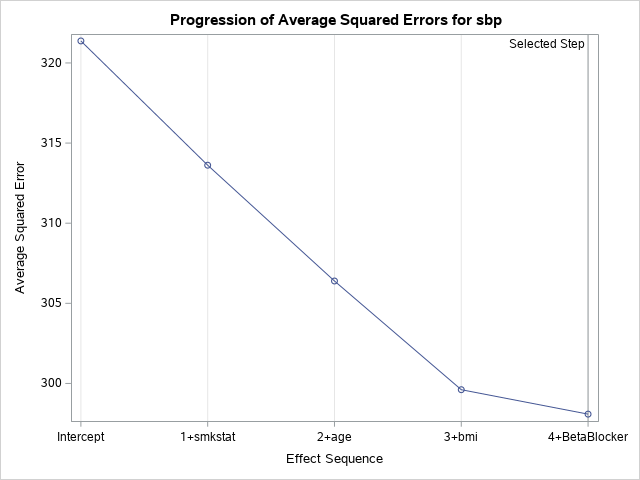

In [4]:
proc glmselect data=bloodp plots=(CriterionPanel ASE);
     class smkstat BetaBlocker SRHealth; 
     model sbp = SRHealth smkstat BetaBlocker bmi age 
                  / selection=forward(select=SL);
run;